# Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
from IPython.display import clear_output
pd.set_option('display.max_columns', None)

In [2]:
%cd /home/aloysius/repos/Code \and \Dataset/Dataset
!ls

/home/aloysius/repos/Code and Dataset/Dataset
daily_chart	  login_report_usd.csv	   README.md   trades.csv
daily_report.csv  login_trades_symbol.csv  reason.csv
login.csv	  login_trades_usd.csv	   symbol.csv


/home/aloysius/anaconda3/envs/DataAnalytics/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Data Visualisation

### Sample data of each csv file

In [3]:
# import login.csv
login = pd.read_csv("login.csv")
login['reg_date'] = pd.to_datetime(login['reg_date'],unit='s')
login.head()

,login,country,account_currency,reg_date
0,457547,Romania,EUR,2021-02-25 00:15:32
1,474589,CA,CAD,2021-01-07 02:44:02
2,504321,CA,CAD,2020-10-14 02:31:50
3,504322,CA,USD,2020-10-15 04:35:45
4,504326,CA,USD,2020-10-19 07:39:12


In [4]:
# import trades.csv
trades = pd.read_csv("trades.csv")
trades['open_time'] = pd.to_datetime(trades['open_time'],unit='s')
trades['close_time'] = pd.to_datetime(trades['close_time'],unit='s')
trades.head()

,ticket,login,symbol,cmd,volume,open_time,open_price,close_time,close_price,tp,sl,reason,commission,swaps,profit,volume_usd
0,68880703,7062462,XAUUSD,0,0.01,2024-02-13 17:05:41,1991.35000,2024-02-15 16:05:14,2003.01000,0.00000,0.00000,1,0.00,-1.12,10.83,3994.36
1,68880910,7062462,XAUUSD,0,0.02,2024-02-13 17:08:49,1990.30000,2024-02-15 16:05:10,2002.76000,0.00000,0.00000,1,0.00,-2.25,23.16,7986.12
2,68120690,813125,US2000,0,1.00,2024-01-24 07:56:45,1983.22000,2024-01-24 16:41:43,1996.68000,2012.34000,1980.03000,1,0.00,0.00,105.42,39799.00
3,68169249,813125,US2000,0,2.00,2024-01-24 23:36:11,1960.62000,2024-01-25 16:29:03,1991.51000,2331.85000,1958.94000,1,0.00,-7.21,485.26,79042.60
4,68186877,88945036,NZDUSD,0,0.13,2024-01-25 08:00:00,0.61062,2024-01-25 15:38:26,0.61317,0.61312,0.55059,1,-0.91,0.00,33.15,15909.27


In [5]:
# import symbol.csv
symbol = pd.read_csv("symbol.csv")
symbol.head()

,symbol,description,type
0,ALUMINIUM,Aluminium vs US Dollar,Commodity
1,COPPER,Copper vs US Dollar,Commodity
2,GAS,Natural Gas vs US Dollar,Commodity
3,LEAD,Lead vs US Dollar,Commodity
4,NICKEL,Nickel vs US Dollar,Commodity


In [6]:
# import reason.csv
reason = pd.read_csv("reason.csv")
reason.head()

,code,reason
0,0,Client
1,1,Expert
2,2,Dealer
3,3,Signal
4,4,Gateway


In [7]:
# import daily_report.csv
daily_report = pd.read_csv("daily_report.csv")
daily_report.head()

,login,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin
0,457547,2023-01-01,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1,474589,2023-01-01,0.0,0.56,0.56,0.0,0.0,0.0,0.0
2,504321,2023-01-01,0.0,2.03,2.03,0.0,0.0,0.0,0.0
3,504322,2023-01-01,0.0,0.51,0.51,0.0,0.0,0.0,0.0
4,504326,2023-01-01,0.0,0.01,0.01,0.0,0.0,0.0,0.0


In [8]:
# import daily_chart
# USDPLN, USDSEK, GBPUSD,AUDUSD,EURUSD,USDCAD,USDCHF,USDHUF,USDJPY,USDMXN,USDNOK,USDSGD,USDHKD,USDTRY,USDZAR,USDTHB,NZDUSD,USDCNH
directory = "daily_chart"
daily_chart = {}
for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
  if os.path.isfile(f):
    daily_chart[filename.replace(".csv","")] = pd.read_csv(f)

In [9]:
daily_chart["USDPLN"].head()

,date,close
0,2023.01.03 00:00,4.43075
1,2023.01.04 00:00,4.39765
2,2023.01.05 00:00,4.45195
3,2023.01.06 00:00,4.40495
4,2023.01.09 00:00,4.37275


### Summary statistics for different features

In [10]:
# Summary statistics for numerical data in login.csv
login.describe()

,login,reg_date
count,4.051200e+04,40512
mean,4.114042e+06,2023-01-15 14:45:41.847625216
min,4.575470e+05,2016-09-01 07:58:45
25%,7.666532e+05,2022-06-27 04:20:56
50%,8.189200e+05,2023-08-08 07:47:15
75%,7.058757e+06,2023-11-21 18:36:09.249999872
max,1.000059e+09,2024-03-05 07:31:59
std,1.763452e+07,NaN


In [11]:
# Summary statistic for categorical data in login.csv
login.describe(include = "object")

,country,account_currency
count,40505,40512
unique,384,8
top,France,USD
freq,4217,23784


In [12]:
# Summary statistics for trade.csv
trades.describe()

,ticket,login,cmd,volume,open_time,open_price,close_time,close_price,tp,sl,reason,commission,swaps,profit,volume_usd
count,4.521777e+06,4.521777e+06,4.521777e+06,4.521777e+06,4521777,4.521777e+06,4521777,4.521777e+06,4.521777e+06,4.521777e+06,4.521777e+06,4.521777e+06,4.521777e+06,4.521777e+06,4.521777e+06
mean,6.434446e+07,4.846334e+06,5.160031e-01,1.518245e-01,2023-10-01 18:31:30.783326208,5.175355e+03,2023-10-02 10:23:29.961771008,5.177114e+03,1.078012e+03,3.622738e+03,1.993425e+00,-1.955385e-01,-1.847146e-01,-4.315914e-01,6.586748e+07
min,4.828167e+07,5.043260e+05,0.000000e+00,0.000000e+00,2023-01-03 00:04:01,8.672000e-02,2023-01-03 00:08:15,8.516000e-02,0.000000e+00,0.000000e+00,0.000000e+00,-3.720000e+02,-1.380536e+04,-2.704170e+05,0.000000e+00
25%,6.163518e+07,7.735480e+05,0.000000e+00,1.000000e-02,2023-08-03 12:30:26,1.263720e+00,2023-08-03 19:30:57,1.263760e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-9.800000e-01,3.672890e+03
50%,6.434772e+07,8.160060e+05,1.000000e+00,3.000000e-02,2023-10-10 01:15:03,1.826760e+03,2023-10-10 12:37:05,1.826410e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.700000e-01,9.825430e+03
75%,6.769157e+07,8.243480e+05,1.000000e+00,9.000000e-02,2024-01-10 15:20:13,2.026140e+03,2024-01-11 12:16:48,2.026260e+03,1.096620e+00,1.464700e+02,5.000000e+00,0.000000e+00,0.000000e+00,3.250000e+00,4.063040e+04
max,6.950492e+07,1.000055e+09,1.000000e+00,3.850000e+02,2024-02-29 23:50:30,6.431767e+04,2024-02-29 23:59:33,6.416816e+04,4.668737e+07,2.151252e+07,7.000000e+00,0.000000e+00,1.165900e+04,1.740172e+05,1.717606e+11
std,3.584527e+06,3.774474e+07,4.997439e-01,1.277018e+00,NaN,9.947746e+03,NaN,9.951437e+03,3.565901e+04,1.014604e+05,1.941132e+00,1.946491e+00,2.196618e+01,5.965600e+02,9.253712e+08


### Some graph

#### Exchange rate

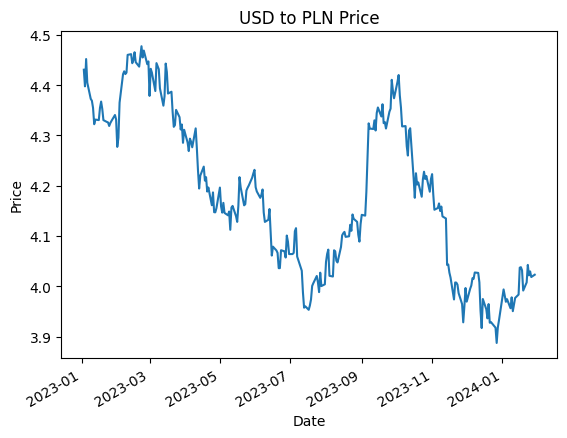

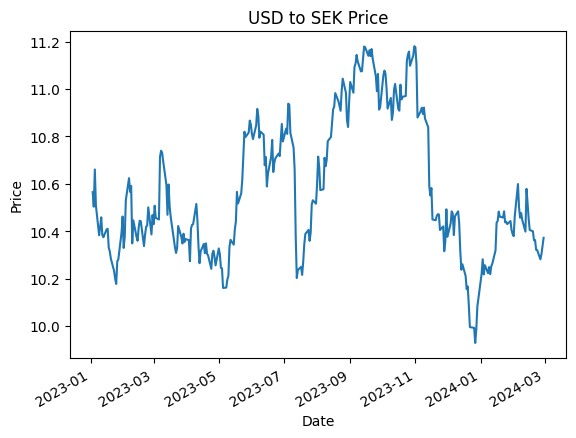

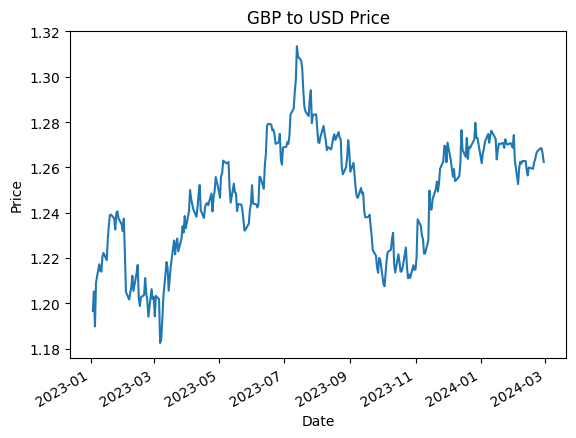

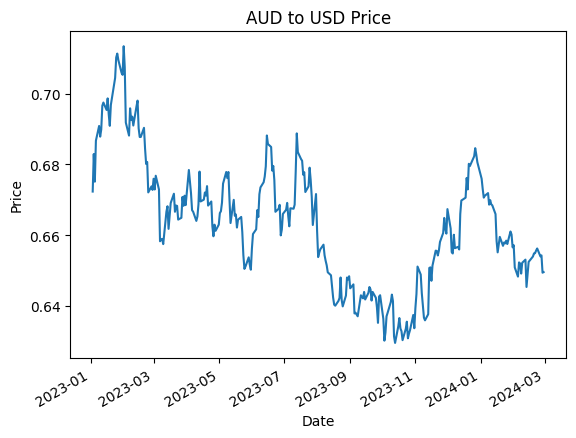

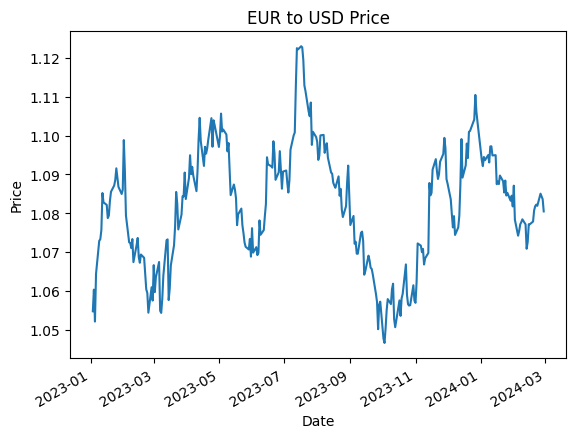

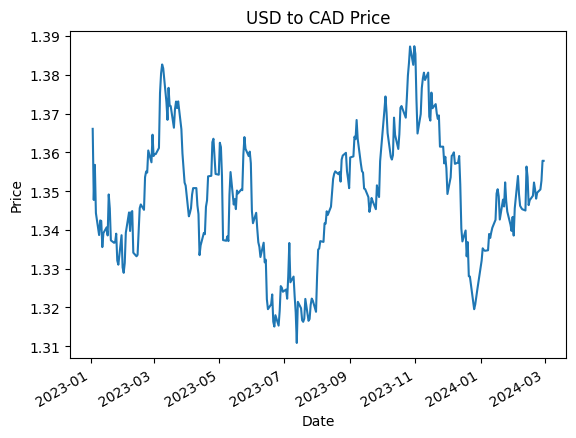

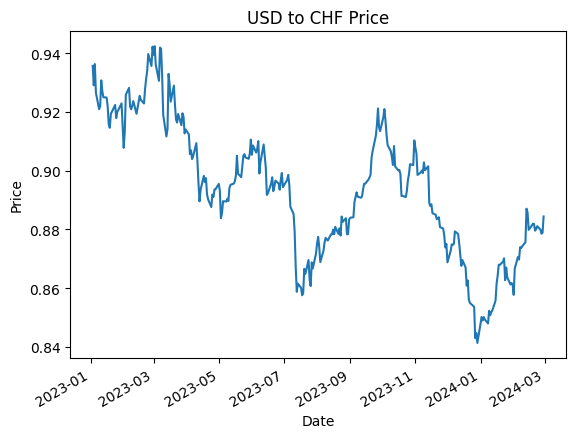

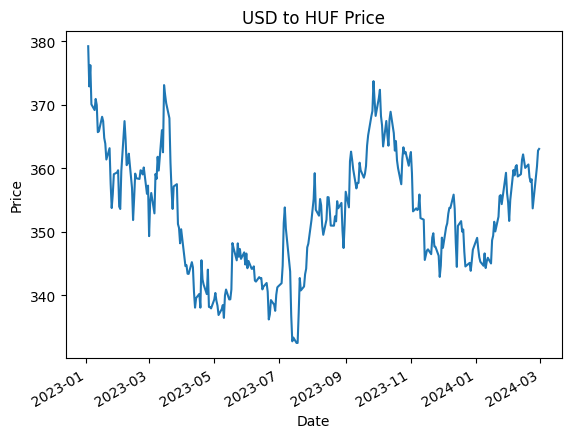

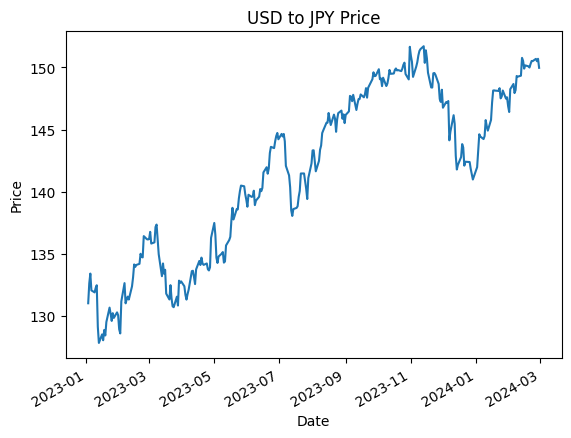

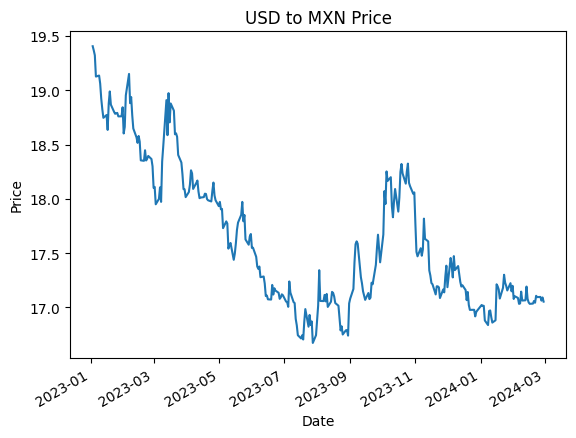

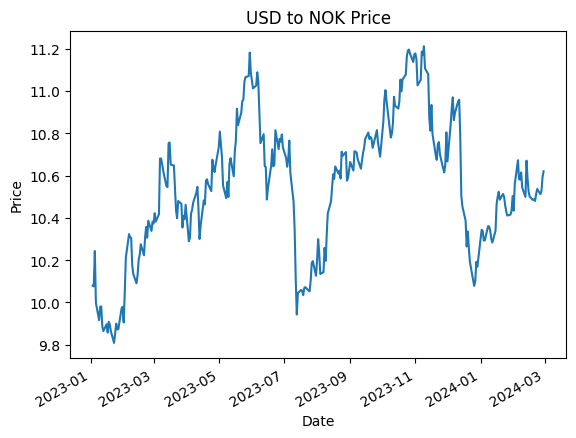

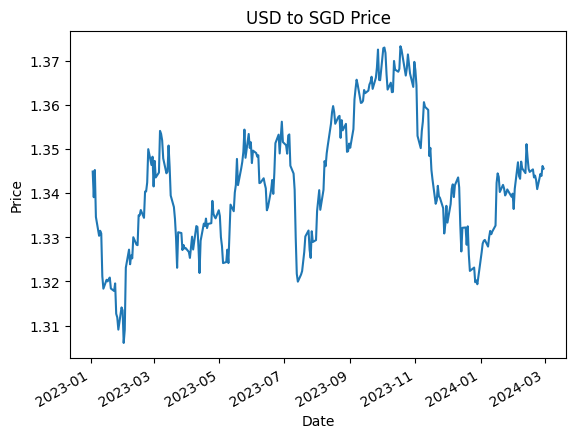

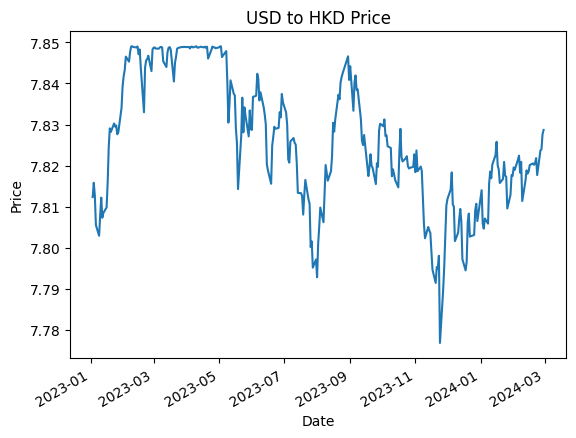

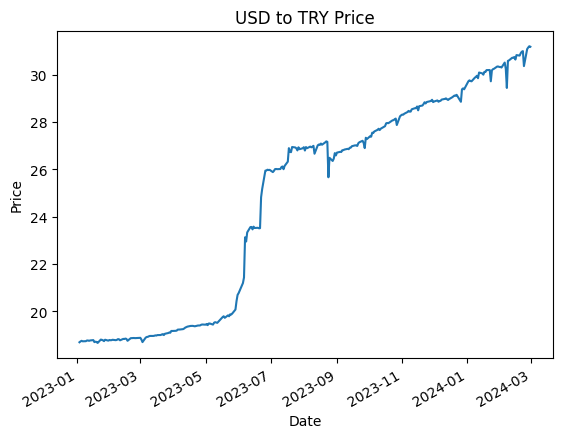

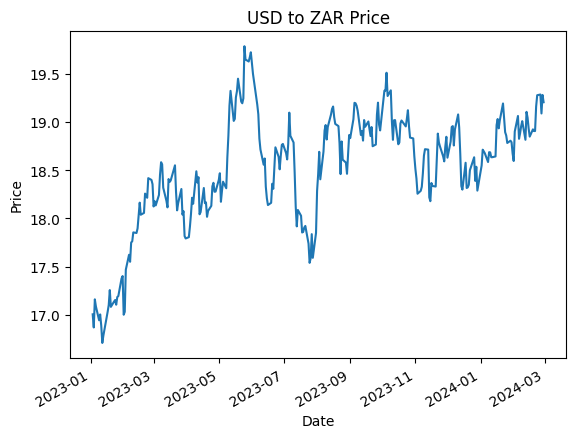

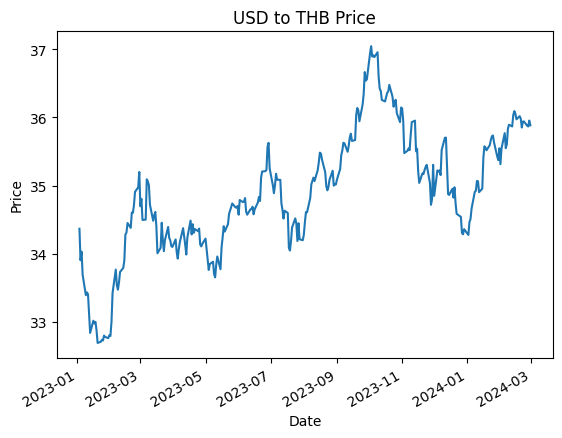

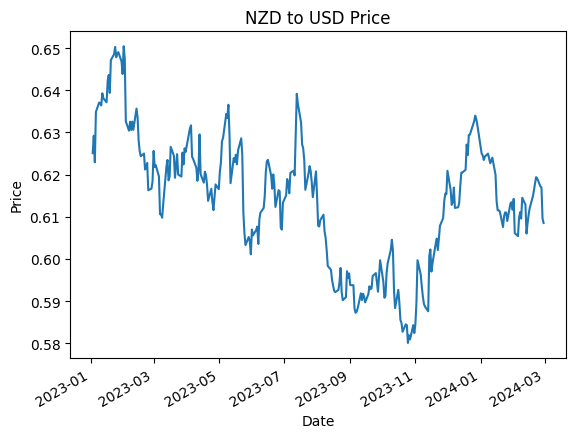

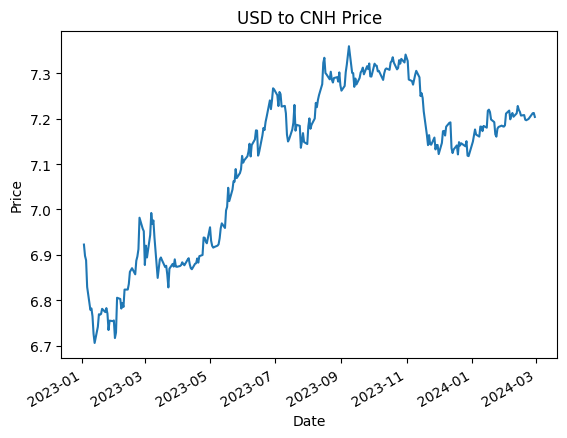

In [13]:
list_of_currency = ["USDPLN", "USDSEK", "GBPUSD","AUDUSD",
                    "EURUSD","USDCAD","USDCHF","USDHUF",
                    "USDJPY","USDMXN","USDNOK","USDSGD",
                    "USDHKD","USDTRY","USDZAR","USDTHB",
                    "NZDUSD","USDCNH"]
for currency in list_of_currency:
  daily_chart[currency]["date"] = pd.to_datetime(daily_chart[currency]['date'])
  daily_chart[currency].plot(x = 'date', y = 'close', title = f"{currency[0:3]} to {currency[3:6]} Price" , xlabel = "Date", ylabel="Price", legend = False)

#### Account Currency Count

<Axes: title={'center': 'Account Currency Counts'}, xlabel='Currency', ylabel='Frequency'>

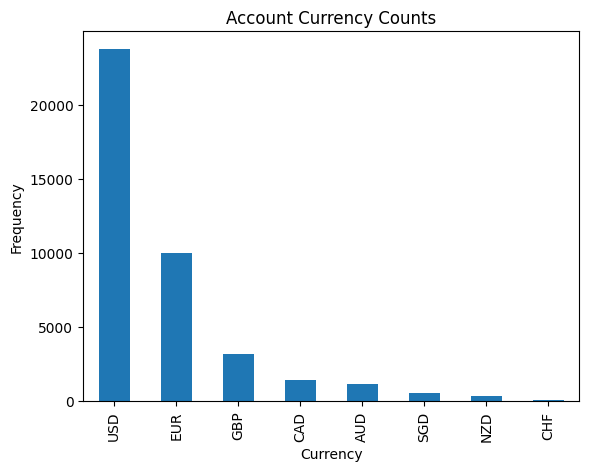

In [14]:
login["account_currency"].value_counts().plot(kind="bar", title = "Account Currency Counts", xlabel = "Currency", ylabel = "Frequency")

#### Products being traded Count

<Axes: title={'center': 'Top 30 mostly traded symbol'}, xlabel='Symbol', ylabel='Frequency'>

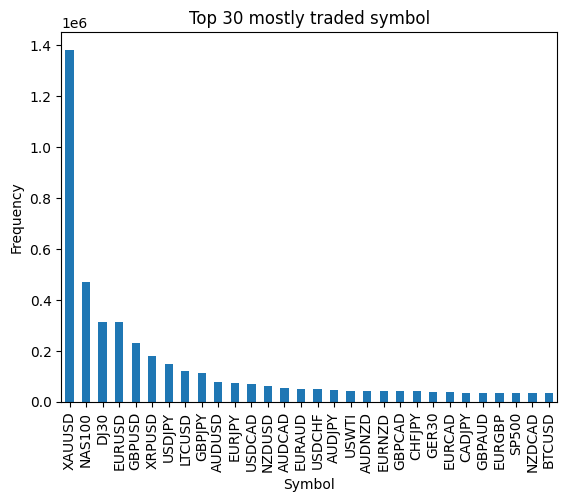

In [15]:
trades["symbol"].value_counts().iloc[:30].plot(kind = "bar", title = "Top 30 mostly traded symbol", xlabel = "Symbol", ylabel = "Frequency")

#### Buy and Sell Count

<Axes: title={'center': 'Buy/Sell Counts'}, xlabel='Action', ylabel='Frequency'>

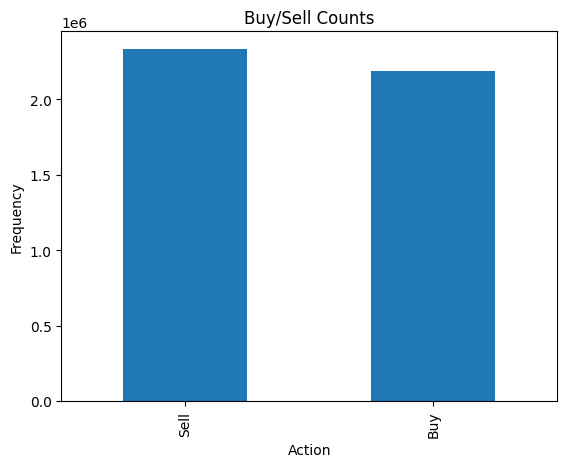

In [16]:
trades["cmd"].map({0:"Buy",1:"Sell"}).value_counts().plot(kind = "bar", title = "Buy/Sell Counts", xlabel = "Action", ylabel = "Frequency")

## Merge Login and Trades

In [17]:
login_trades = pd.merge(login,trades,on="login", how="right")
login_trades.head()

,login,country,account_currency,reg_date,ticket,symbol,cmd,volume,open_time,open_price,close_time,close_price,tp,sl,reason,commission,swaps,profit,volume_usd
0,7062462,Latvia,EUR,2023-12-22 18:51:59,68880703,XAUUSD,0,0.01,2024-02-13 17:05:41,1991.35000,2024-02-15 16:05:14,2003.01000,0.00000,0.00000,1,0.00,-1.12,10.83,3994.36
1,7062462,Latvia,EUR,2023-12-22 18:51:59,68880910,XAUUSD,0,0.02,2024-02-13 17:08:49,1990.30000,2024-02-15 16:05:10,2002.76000,0.00000,0.00000,1,0.00,-2.25,23.16,7986.12
2,813125,United Kingdom,GBP,2023-05-20 18:43:18,68120690,US2000,0,1.00,2024-01-24 07:56:45,1983.22000,2024-01-24 16:41:43,1996.68000,2012.34000,1980.03000,1,0.00,0.00,105.42,39799.00
3,813125,United Kingdom,GBP,2023-05-20 18:43:18,68169249,US2000,0,2.00,2024-01-24 23:36:11,1960.62000,2024-01-25 16:29:03,1991.51000,2331.85000,1958.94000,1,0.00,-7.21,485.26,79042.60
4,88945036,Nigeria,USD,2023-05-01 04:36:26,68186877,NZDUSD,0,0.13,2024-01-25 08:00:00,0.61062,2024-01-25 15:38:26,0.61317,0.61312,0.55059,1,-0.91,0.00,33.15,15909.27


In [18]:
###Convert Account Currency to USD

In [19]:
login_trades["account_currency"].unique()

array(['EUR', 'GBP', 'USD', 'SGD', 'CAD', 'AUD', 'NZD', 'CHF'],
      dtype=object)

In [20]:
def currency_conversion(row, target, time="close_time"):
    if row["account_currency"] == "EUR":
        euro_date = daily_chart["EURUSD"].loc[:,["date"]]
        rate = daily_chart["EURUSD"]["close"].loc[euro_date.set_index('date').index.get_indexer([row[time]], method='nearest')].to_numpy()[0]
        return target * rate
    if row["account_currency"] == "GBP":
        gbp_date = daily_chart["GBPUSD"].loc[:,["date"]]
        rate = daily_chart["GBPUSD"]["close"].loc[gbp_date.set_index('date').index.get_indexer([row[time]], method='nearest')].to_numpy()[0]
        return target * rate
    if row["account_currency"] == "USD":
        return target
    if row["account_currency"] == "SGD":
        sgd_date = daily_chart["USDSGD"].loc[:,["date"]]
        rate = daily_chart["USDSGD"]["close"].loc[sgd_date.set_index('date').index.get_indexer([row[time]], method='nearest')].to_numpy()[0]
        return target * (1.0 / rate)
    if row["account_currency"] == "CAD":
        cad_date = daily_chart["USDCAD"].loc[:,["date"]]
        rate = daily_chart["USDCAD"]["close"].loc[cad_date.set_index('date').index.get_indexer([row[time]], method='nearest')].to_numpy()[0]
        return target * (1.0 / rate)
    if row["account_currency"] == "AUD":
        aud_date = daily_chart["AUDUSD"].loc[:,["date"]]
        rate = daily_chart["AUDUSD"]["close"].loc[aud_date.set_index('date').index.get_indexer([row[time]], method='nearest')].to_numpy()[0]
        return target * rate
    if row["account_currency"] == "NZD":
        nzd_date = daily_chart["NZDUSD"].loc[:,["date"]]
        rate = daily_chart["NZDUSD"]["close"].loc[nzd_date.set_index('date').index.get_indexer([row[time]], method='nearest')].to_numpy()[0]
        return target * rate
    if row["account_currency"] == "CHF":
        chf_date = daily_chart["USDCHF"].loc[:,["date"]]
        rate = daily_chart["USDCHF"]["close"].loc[chf_date.set_index('date').index.get_indexer([row[time]], method='nearest')].to_numpy()[0]
        return target * (1.0 / rate)

In [21]:
login_trades['commission_usd'] = login_trades.apply(lambda row:currency_conversion(row, row["commission"] ), axis=1)
login_trades['swaps_usd'] = login_trades.apply(lambda row:currency_conversion(row, row["swaps"] ), axis=1)
login_trades['profit_usd'] = login_trades.apply(lambda row:currency_conversion(row, row["profit"] ), axis=1)
login_trades['open_price_usd'] = login_trades.apply(lambda row:currency_conversion(row, row["open_price"],time="open_time" ), axis=1)
login_trades['close_price_usd'] = login_trades.apply(lambda row:currency_conversion(row, row["close_price"] ), axis=1)
login_trades.head()

KeyboardInterrupt: 

In [ ]:
replace = {
    "AE":"United Arab Emirates", "AG": "Antigua and Barbuda", "AL": "Albania", "AR": "Argentina", "AT":"Austria", "AU":"Australia", "AW":"Aruba",
    "BB":"Barbados", "BD":"Bangladesh", "BG": "Bulgaria", "BJ": "Benin", "BN": "Brunei", "BO" : "Bolivia", "BR":"Brazil", "BS":"Bahamas", "Bonaire, Sint E":"Caribbean Netherlands","Bosnia and Herz":"Bosnia and Herzegovina",
    "CA":"Canada", "CH":"Switzerland", "CI":"Côte d'Ivoire", "CL":"Chile","CM":"Cameroon", "CN": "China", "CO":"Colombia", "CR":"Costa Rica", "CZ":"Czechia", "Congo (Republic":"Republic of Congo", "Congo (Republic)":"Republic of Congo",
    "Cote D'ivoire":"Côte d'Ivoire", "Curacao":"Curaçao","CuraÃ§ao":"Curaçao", "Czechia":"Czech Republic",
    "DE":"Germany","DK":"Denmark","DM":"Dominica","DO":"Dominican Republic", "DZ":"Algeria","Dominican Repub":"Dominican Republic",
    "EC":"Ecuador","EE":"Estonia","ES":"Spain",
    "FR":"France", "French Polynesi":"French Polynesia",
    "GB":"United Kingdom","GD":"Grenada","GH":"Ghana","GN":"Guinea","GR":"Greece", "GY":"Guyana",
    "HK":"Hong Kong","HR":"Croatia","HT":"Haiti","HU":"Hungary","Hong Kong S.A.R.": "Hong Kong", "Hong+Kong":"Hong Kong",
    "ID":"Indonesia","IE":"Ireland","IN":"India","IT":"Italy",
    "JM":"Jamaica",
    "KE":"Kenya","KH":"Cambodia", "KN":"Saint Kitts and Nevis", "KR":"South Korea", "KW":"Kuwait", "KZ":"Kazakhstan", "Korea, South" : "South Korea",
    "LC":"Saint Lucia", "LK":"Sri Lanka", "LR":"Liberia", "LS":"Lesotho","LT":"Lithuania", "LV":"Latvia",
    "MA":"Morocco","MD":"Moldova","ME":"Montenegro","MQ":"Martinique", "MT":"Malta","MU":"Mauritius","MV":"Maldives","MX":"Mexico","MY":"Malaysia", "MZ":"Mozambique","Macedonia":"North Macedonia",
    "NC":"New Caledonia","NG":"Nigeria","NL":"Netherlands","NO":"Norway","NZ":"New Zealand",
    "PF":"French Polynesia","PG":"Papua New Guinea","PH":"Philippines","PK":"Pakistan", "PL":"Poland","PT":"Portugal","Palestinian Authority":"Palestine","Papua New Guine":"Papua New Guinea",
    "QA":"Qatar",
    "RE":"Réunion","RO":"Romania","RÃ©union":"Réunion","Reunion":"Réunion",
    "SA":"Saudi Arabia","SE":"Sweden","SG":"Singapore","SI":"Slovenia","SK":"Slovakia","Saint Vincent a":"Saint Vincent and The Grenadine","Sint Maarten (Dutch part)":"Sint Maarten", "Swaziland": "Eswatini",
    "TC":"Turks and Caicos Islands","TH":"Thailand","TW":"Taiwan","Taiwan, China":"Taiwan","Trinidad and To":"Trinidad and Tobago","Turks and Caico":"Turks and Caicos Islands","Turks and Caicos":"Turks and Caicos Islands",
    "UG":"Uganda", "United Arab Emi":"United Arab Emirates","United+Kingdom":"United Kingdom",
    "VI":"Virgin Islands (U.S.)",
    "Wallis and Futu":"Wallis and Futuna",
    "YT":"Mayotte",
    "ZA": "South Africa", "ZM":"Zambia"
    
    
}
login_trades.replace({"country":replace},inplace=True)

In [26]:
login_trades_symbol= login_trades_symbol[['login',
 'country',
 'account_currency',
 'reg_date',
 'ticket',
 'symbol',
 'description',
 'type',
 'cmd',
 'volume',
 'open_time',
 'open_price',
 'close_time',
 'close_price',
 'tp',
 'sl',
 'reason',
 'commission',
 'commission_usd',
 'swaps',
 'swaps_usd',
 'profit',
 'profit_usd',
 'volume_usd']]

NameError: name 'login_trades_symbol' is not defined

In [ ]:
login_trades_symbol.columns

In [ ]:
### 

In [ ]:
login_trades_symbol

In [ ]:
ippu = login_trades_symbol["volume"]/login_trades_symbol["volume_usd"]
vim = ippu * 1000000
dpm = login_trades_symbol["profit_usd"]/vim
login_trades_symbol = pd.concat([login_trades_symbol, dpm.rename("dpm")], axis=1)

In [ ]:
login_trades_symbol.to_csv("login_trades_symbol.csv",index=False)

In [ ]:
login_trades_symbol.boxplot(by = "type", column = "dpm" )

In [ ]:
q_low = login_trades_symbol["dpm"].quantile(0.05)
q_hi  = login_trades_symbol["dpm"].quantile(0.95)

df_filtered = login_trades_symbol[(login_trades_symbol["dpm"] < q_hi) & (login_trades_symbol["dpm"] > q_low)]
df_filtered.boxplot(by = "type", column = "dpm", )

In [ ]:
login_trades_symbol.head()

In [ ]:
len(login_trades_symbol["login"].unique())

# Today

In [16]:
login_trades_symbol = pd.read_csv("login_trades_symbol.csv")
login_trades_symbol

,login,country,account_currency,reg_date,ticket,symbol,description,type,cmd,volume,open_time,open_price,close_time,close_price,tp,sl,reason,commission,commission_usd,swaps,swaps_usd,profit,profit_usd,volume_usd,dpm
0,7062462,Latvia,EUR,2023-12-22 18:51:59,68880703,XAUUSD,Gold vs US Dollar,Metal,0,0.01,2024-02-13 17:05:41,1991.35000,2024-02-15 16:05:14,2003.01000,0.00000,0.00000,1,0.00,0.000000,-1.12,-1.206408,10.83,11.665534,3994.36,4.659634
1,7062462,Latvia,EUR,2023-12-22 18:51:59,68880910,XAUUSD,Gold vs US Dollar,Metal,0,0.02,2024-02-13 17:08:49,1990.30000,2024-02-15 16:05:10,2002.76000,0.00000,0.00000,1,0.00,0.000000,-2.25,-2.423588,23.16,24.946794,7986.12,9.961405
2,813125,United Kingdom,GBP,2023-05-20 18:43:18,68120690,US2000,US Small Cap 2000 Cash,Index,0,1.00,2024-01-24 07:56:45,1983.22000,2024-01-24 16:41:43,1996.68000,2012.34000,1980.03000,1,0.00,0.000000,0.00,0.000000,105.42,133.959302,39799.00,5.331446
3,813125,United Kingdom,GBP,2023-05-20 18:43:18,68169249,US2000,US Small Cap 2000 Cash,Index,0,2.00,2024-01-24 23:36:11,1960.62000,2024-01-25 16:29:03,1991.51000,2331.85000,1958.94000,1,0.00,0.000000,-7.21,-9.156988,485.26,616.299610,79042.60,24.356962
4,88945036,Nigeria,USD,2023-05-01 04:36:26,68186877,NZDUSD,New Zealand Dollar vs US Dollar,Forex,0,0.13,2024-01-25 08:00:00,0.61062,2024-01-25 15:38:26,0.61317,0.61312,0.55059,1,-0.91,-0.910000,0.00,0.000000,33.15,33.150000,15909.27,4.056864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4521772,810950,United Kingdom,USD,2023-04-14 19:29:33,68795989,XAUUSD,Gold vs US Dollar,Metal,0,0.10,2024-02-12 11:53:03,2020.74000,2024-02-13 07:53:25,2021.51000,2026.00000,0.00000,5,0.00,0.000000,0.00,0.000000,7.70,7.700000,40422.50,3.112533
4521773,810950,United Kingdom,USD,2023-04-14 19:29:33,68796026,XAUUSD,Gold vs US Dollar,Metal,0,0.10,2024-02-12 11:53:14,2020.70000,2024-02-13 07:53:29,2021.50000,2026.00000,0.00000,5,0.00,0.000000,0.00,0.000000,8.00,8.000000,40422.00,3.233760
4521774,810799,France,EUR,2023-04-12 14:29:35,68854039,EURUSD,Euro vs US Dollar,Forex,1,0.10,2024-02-13 11:56:54,1.07654,2024-02-13 12:00:16,1.07693,0.00000,1.07694,5,-0.60,-0.643554,0.00,0.000000,-3.62,-3.882776,21534.70,-0.836144
4521775,810710,France,EUR,2023-04-11 18:29:39,68785760,GER30,GER30 Cash,Index,1,0.03,2024-02-12 09:09:05,16994.30000,2024-02-13 11:41:03,16934.00000,0.00000,17120.00000,5,0.00,0.000000,0.13,0.139208,18.09,19.371315,10931.50,7.058584


In [17]:
login_report = pd.merge(login,daily_report,on="login", how="right")
login_report['record_time'] = pd.to_datetime(login_report['record_time'])
login_report['record_time'] = login_report['record_time'].dt.floor('d') + pd.Timedelta(hours=23,minutes=59,seconds=59)
login_report['record_time'] = pd.to_datetime(login_report['record_time'], unit = 's')
login_report

,login,country,account_currency,reg_date,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin
0,457547,Romania,EUR,2021-02-25 00:15:32,2023-01-01 23:59:59,0.0,0.00,0.00,0.0,0.00,0.00,0.00
1,474589,CA,CAD,2021-01-07 02:44:02,2023-01-01 23:59:59,0.0,0.56,0.56,0.0,0.00,0.00,0.00
2,504321,CA,CAD,2020-10-14 02:31:50,2023-01-01 23:59:59,0.0,2.03,2.03,0.0,0.00,0.00,0.00
3,504322,CA,USD,2020-10-15 04:35:45,2023-01-01 23:59:59,0.0,0.51,0.51,0.0,0.00,0.00,0.00
4,504326,CA,USD,2020-10-19 07:39:12,2023-01-01 23:59:59,0.0,0.01,0.01,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
8664156,1000055123,Canada,USD,2023-11-07 08:04:15,2024-02-29 23:59:59,0.0,37521.00,36507.56,0.0,-122.18,-1013.44,818.92
8664157,1000055441,Korea,USD,2023-12-13 03:12:07,2024-02-29 23:59:59,0.0,0.00,0.00,0.0,0.00,0.00,0.00
8664158,1000055515,Netherlands,EUR,2023-12-22 11:17:21,2024-02-29 23:59:59,0.0,0.00,0.00,0.0,0.00,0.00,0.00
8664159,1000059485,France,EUR,2024-01-17 19:23:28,2024-02-29 23:59:59,0.0,0.00,0.00,0.0,0.00,0.00,0.00


In [20]:
def currency_conversion2(row, target):
    if row["account_currency"] == "EUR":
        euro_date = daily_chart["EURUSD"].loc[:,["date"]]
        rate = daily_chart["EURUSD"]["close"].loc[euro_date.set_index('date').index.get_indexer([row["record_time"]], method='nearest')].to_numpy()[0]
        return target * rate
    if row["account_currency"] == "GBP":
        gbp_date = daily_chart["GBPUSD"].loc[:,["date"]]
        rate = daily_chart["GBPUSD"]["close"].loc[gbp_date.set_index('date').index.get_indexer([row["record_time"]], method='nearest')].to_numpy()[0]
        return target * rate
    if row["account_currency"] == "USD":
        return target
    if row["account_currency"] == "SGD":
        sgd_date = daily_chart["USDSGD"].loc[:,["date"]]
        rate = daily_chart["USDSGD"]["close"].loc[sgd_date.set_index('date').index.get_indexer([row["record_time"]], method='nearest')].to_numpy()[0]
        return target * (1.0 / rate)
    if row["account_currency"] == "CAD":
        cad_date = daily_chart["USDCAD"].loc[:,["date"]]
        rate = daily_chart["USDCAD"]["close"].loc[cad_date.set_index('date').index.get_indexer([row["record_time"]], method='nearest')].to_numpy()[0]
        return target * (1.0 / rate)
    if row["account_currency"] == "AUD":
        aud_date = daily_chart["AUDUSD"].loc[:,["date"]]
        rate = daily_chart["AUDUSD"]["close"].loc[aud_date.set_index('date').index.get_indexer([row["record_time"]], method='nearest')].to_numpy()[0]
        return target * rate
    if row["account_currency"] == "NZD":
        nzd_date = daily_chart["NZDUSD"].loc[:,["date"]]
        rate = daily_chart["NZDUSD"]["close"].loc[nzd_date.set_index('date').index.get_indexer([row["record_time"]], method='nearest')].to_numpy()[0]
        return target * rate
    if row["account_currency"] == "CHF":
        chf_date = daily_chart["USDCHF"].loc[:,["date"]]
        rate = daily_chart["USDCHF"]["close"].loc[chf_date.set_index('date').index.get_indexer([row["record_time"]], method='nearest')].to_numpy()[0]
        return target * (1.0 / rate)

In [21]:
login_report['net_deposit_usd'] = login_report.apply(lambda row:currency_conversion2(row, row["net_deposit"] ), axis=1)
login_trades.head()

,login,country,account_currency,reg_date,ticket,symbol,cmd,volume,open_time,open_price,close_time,close_price,tp,sl,reason,commission,swaps,profit,volume_usd
0,7062462,Latvia,EUR,2023-12-22 18:51:59,68880703,XAUUSD,0,0.01,2024-02-13 17:05:41,1991.35000,2024-02-15 16:05:14,2003.01000,0.00000,0.00000,1,0.00,-1.12,10.83,3994.36
1,7062462,Latvia,EUR,2023-12-22 18:51:59,68880910,XAUUSD,0,0.02,2024-02-13 17:08:49,1990.30000,2024-02-15 16:05:10,2002.76000,0.00000,0.00000,1,0.00,-2.25,23.16,7986.12
2,813125,United Kingdom,GBP,2023-05-20 18:43:18,68120690,US2000,0,1.00,2024-01-24 07:56:45,1983.22000,2024-01-24 16:41:43,1996.68000,2012.34000,1980.03000,1,0.00,0.00,105.42,39799.00
3,813125,United Kingdom,GBP,2023-05-20 18:43:18,68169249,US2000,0,2.00,2024-01-24 23:36:11,1960.62000,2024-01-25 16:29:03,1991.51000,2331.85000,1958.94000,1,0.00,-7.21,485.26,79042.60
4,88945036,Nigeria,USD,2023-05-01 04:36:26,68186877,NZDUSD,0,0.13,2024-01-25 08:00:00,0.61062,2024-01-25 15:38:26,0.61317,0.61312,0.55059,1,-0.91,0.00,33.15,15909.27


In [22]:
login_report['balance_usd'] = login_report.apply(lambda row:currency_conversion2(row, row["balance"] ), axis=1)
login_trades.head()

,login,country,account_currency,reg_date,ticket,symbol,cmd,volume,open_time,open_price,close_time,close_price,tp,sl,reason,commission,swaps,profit,volume_usd
0,7062462,Latvia,EUR,2023-12-22 18:51:59,68880703,XAUUSD,0,0.01,2024-02-13 17:05:41,1991.35000,2024-02-15 16:05:14,2003.01000,0.00000,0.00000,1,0.00,-1.12,10.83,3994.36
1,7062462,Latvia,EUR,2023-12-22 18:51:59,68880910,XAUUSD,0,0.02,2024-02-13 17:08:49,1990.30000,2024-02-15 16:05:10,2002.76000,0.00000,0.00000,1,0.00,-2.25,23.16,7986.12
2,813125,United Kingdom,GBP,2023-05-20 18:43:18,68120690,US2000,0,1.00,2024-01-24 07:56:45,1983.22000,2024-01-24 16:41:43,1996.68000,2012.34000,1980.03000,1,0.00,0.00,105.42,39799.00
3,813125,United Kingdom,GBP,2023-05-20 18:43:18,68169249,US2000,0,2.00,2024-01-24 23:36:11,1960.62000,2024-01-25 16:29:03,1991.51000,2331.85000,1958.94000,1,0.00,-7.21,485.26,79042.60
4,88945036,Nigeria,USD,2023-05-01 04:36:26,68186877,NZDUSD,0,0.13,2024-01-25 08:00:00,0.61062,2024-01-25 15:38:26,0.61317,0.61312,0.55059,1,-0.91,0.00,33.15,15909.27


In [23]:
login_report['equity_usd'] = login_report.apply(lambda row:currency_conversion2(row, row["equity"] ), axis=1)
login_trades.head()

,login,country,account_currency,reg_date,ticket,symbol,cmd,volume,open_time,open_price,close_time,close_price,tp,sl,reason,commission,swaps,profit,volume_usd
0,7062462,Latvia,EUR,2023-12-22 18:51:59,68880703,XAUUSD,0,0.01,2024-02-13 17:05:41,1991.35000,2024-02-15 16:05:14,2003.01000,0.00000,0.00000,1,0.00,-1.12,10.83,3994.36
1,7062462,Latvia,EUR,2023-12-22 18:51:59,68880910,XAUUSD,0,0.02,2024-02-13 17:08:49,1990.30000,2024-02-15 16:05:10,2002.76000,0.00000,0.00000,1,0.00,-2.25,23.16,7986.12
2,813125,United Kingdom,GBP,2023-05-20 18:43:18,68120690,US2000,0,1.00,2024-01-24 07:56:45,1983.22000,2024-01-24 16:41:43,1996.68000,2012.34000,1980.03000,1,0.00,0.00,105.42,39799.00
3,813125,United Kingdom,GBP,2023-05-20 18:43:18,68169249,US2000,0,2.00,2024-01-24 23:36:11,1960.62000,2024-01-25 16:29:03,1991.51000,2331.85000,1958.94000,1,0.00,-7.21,485.26,79042.60
4,88945036,Nigeria,USD,2023-05-01 04:36:26,68186877,NZDUSD,0,0.13,2024-01-25 08:00:00,0.61062,2024-01-25 15:38:26,0.61317,0.61312,0.55059,1,-0.91,0.00,33.15,15909.27


In [25]:
login_report['credit_usd'] = login_report.apply(lambda row:currency_conversion2(row, row["credit"] ), axis=1)
login_report.head()

,login,country,account_currency,reg_date,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin,net_deposit_usd,balance_usd,equity_usd,credit_usd
0,457547,Romania,EUR,2021-02-25 00:15:32,2023-01-01 23:59:59,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,474589,CA,CAD,2021-01-07 02:44:02,2023-01-01 23:59:59,0.0,0.56,0.56,0.0,0.0,0.0,0.0,0.0,0.409938,0.409938,0.0
2,504321,CA,CAD,2020-10-14 02:31:50,2023-01-01 23:59:59,0.0,2.03,2.03,0.0,0.0,0.0,0.0,0.0,1.486026,1.486026,0.0
3,504322,CA,USD,2020-10-15 04:35:45,2023-01-01 23:59:59,0.0,0.51,0.51,0.0,0.0,0.0,0.0,0.0,0.510000,0.510000,0.0
4,504326,CA,USD,2020-10-19 07:39:12,2023-01-01 23:59:59,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.010000,0.010000,0.0


In [26]:
login_report['profit_closed__usd'] = login_report.apply(lambda row:currency_conversion2(row, row["profit_closed"] ), axis=1)
login_report.head()

,login,country,account_currency,reg_date,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin,net_deposit_usd,balance_usd,equity_usd,credit_usd,profit_closed__usd
0,457547,Romania,EUR,2021-02-25 00:15:32,2023-01-01 23:59:59,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,474589,CA,CAD,2021-01-07 02:44:02,2023-01-01 23:59:59,0.0,0.56,0.56,0.0,0.0,0.0,0.0,0.0,0.409938,0.409938,0.0,0.0
2,504321,CA,CAD,2020-10-14 02:31:50,2023-01-01 23:59:59,0.0,2.03,2.03,0.0,0.0,0.0,0.0,0.0,1.486026,1.486026,0.0,0.0
3,504322,CA,USD,2020-10-15 04:35:45,2023-01-01 23:59:59,0.0,0.51,0.51,0.0,0.0,0.0,0.0,0.0,0.510000,0.510000,0.0,0.0
4,504326,CA,USD,2020-10-19 07:39:12,2023-01-01 23:59:59,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.010000,0.010000,0.0,0.0


In [27]:
login_report['profit_floating_usd'] = login_report.apply(lambda row:currency_conversion2(row, row["profit_floating"] ), axis=1)
login_report.head()

,login,country,account_currency,reg_date,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin,net_deposit_usd,balance_usd,equity_usd,credit_usd,profit_closed__usd,profit_floating_usd
0,457547,Romania,EUR,2021-02-25 00:15:32,2023-01-01 23:59:59,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,474589,CA,CAD,2021-01-07 02:44:02,2023-01-01 23:59:59,0.0,0.56,0.56,0.0,0.0,0.0,0.0,0.0,0.409938,0.409938,0.0,0.0,0.0
2,504321,CA,CAD,2020-10-14 02:31:50,2023-01-01 23:59:59,0.0,2.03,2.03,0.0,0.0,0.0,0.0,0.0,1.486026,1.486026,0.0,0.0,0.0
3,504322,CA,USD,2020-10-15 04:35:45,2023-01-01 23:59:59,0.0,0.51,0.51,0.0,0.0,0.0,0.0,0.0,0.510000,0.510000,0.0,0.0,0.0
4,504326,CA,USD,2020-10-19 07:39:12,2023-01-01 23:59:59,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.010000,0.010000,0.0,0.0,0.0


In [28]:
login_report['margin_usd'] = login_report.apply(lambda row:currency_conversion2(row, row["margin"] ), axis=1)
login_report.head()

,login,country,account_currency,reg_date,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin,net_deposit_usd,balance_usd,equity_usd,credit_usd,profit_closed__usd,profit_floating_usd,margin_usd
0,457547,Romania,EUR,2021-02-25 00:15:32,2023-01-01 23:59:59,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,474589,CA,CAD,2021-01-07 02:44:02,2023-01-01 23:59:59,0.0,0.56,0.56,0.0,0.0,0.0,0.0,0.0,0.409938,0.409938,0.0,0.0,0.0,0.0
2,504321,CA,CAD,2020-10-14 02:31:50,2023-01-01 23:59:59,0.0,2.03,2.03,0.0,0.0,0.0,0.0,0.0,1.486026,1.486026,0.0,0.0,0.0,0.0
3,504322,CA,USD,2020-10-15 04:35:45,2023-01-01 23:59:59,0.0,0.51,0.51,0.0,0.0,0.0,0.0,0.0,0.510000,0.510000,0.0,0.0,0.0,0.0
4,504326,CA,USD,2020-10-19 07:39:12,2023-01-01 23:59:59,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.010000,0.010000,0.0,0.0,0.0,0.0


In [38]:
login_report_usd = pd.read_csv("login_report_usd.csv")

In [39]:
login_report_usd.head()

,login,country,account_currency,reg_date,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin,net_deposit_usd,balance_usd,equity_usd,credit_usd,profit_closed__usd,profit_floating_usd,margin_usd
0,457547,Romania,EUR,2021-02-25 00:15:32,2023-01-01 23:59:59,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,474589,CA,CAD,2021-01-07 02:44:02,2023-01-01 23:59:59,0.0,0.56,0.56,0.0,0.0,0.0,0.0,0.0,0.409938,0.409938,0.0,0.0,0.0,0.0
2,504321,CA,CAD,2020-10-14 02:31:50,2023-01-01 23:59:59,0.0,2.03,2.03,0.0,0.0,0.0,0.0,0.0,1.486026,1.486026,0.0,0.0,0.0,0.0
3,504322,CA,USD,2020-10-15 04:35:45,2023-01-01 23:59:59,0.0,0.51,0.51,0.0,0.0,0.0,0.0,0.0,0.510000,0.510000,0.0,0.0,0.0,0.0
4,504326,CA,USD,2020-10-19 07:39:12,2023-01-01 23:59:59,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.010000,0.010000,0.0,0.0,0.0,0.0


In [40]:
login_report_usd= login_report_usd[['login',
 'country',
 'account_currency',
 'reg_date',
 'record_time',
 'net_deposit',
 'net_deposit_usd',
 'balance',
 'balance_usd',
 'equity',
 'equity_usd',
 'credit',
 'credit_usd',
 'profit_closed',
 'profit_closed__usd',
 'profit_floating',
 'profit_floating_usd',
 'margin',
 'margin_usd']]

In [41]:
login_report_usd.rename(columns={"profit_closed__usd":"profit_closed_usd"}, inplace = True)
login_report_usd.head()

,login,country,account_currency,reg_date,record_time,net_deposit,net_deposit_usd,balance,balance_usd,equity,equity_usd,credit,credit_usd,profit_closed,profit_closed_usd,profit_floating,profit_floating_usd,margin,margin_usd
0,457547,Romania,EUR,2021-02-25 00:15:32,2023-01-01 23:59:59,0.0,0.0,0.00,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,474589,CA,CAD,2021-01-07 02:44:02,2023-01-01 23:59:59,0.0,0.0,0.56,0.409938,0.56,0.409938,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,504321,CA,CAD,2020-10-14 02:31:50,2023-01-01 23:59:59,0.0,0.0,2.03,1.486026,2.03,1.486026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,504322,CA,USD,2020-10-15 04:35:45,2023-01-01 23:59:59,0.0,0.0,0.51,0.510000,0.51,0.510000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,504326,CA,USD,2020-10-19 07:39:12,2023-01-01 23:59:59,0.0,0.0,0.01,0.010000,0.01,0.010000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
x = daily_report.groupby(["login"]).size().sort_values(ascending=False)

In [52]:
x.groupby(x).size()

1       149
2       119
3        78
4        72
5        61
       ... 
416       9
417      14
418      16
419      18
420    9938
Length: 419, dtype: int64

In [51]:
y

In [56]:
temp = pd.read_csv("/home/aloysius/Downloads/daily_report_DPM.csv")

In [57]:
temp

,login,record_time,net_deposit,balance,equity,credit,profit_closed,profit_floating,margin,profit_usd,volume_usd,DPM
0,519585,2023-01-03,0.0,427.15,427.15,0.0,-16.34,0.00,0.00,-16.340000,6.123180e+03,-2668.548042
1,519979,2023-01-03,0.0,13398.09,10284.23,0.0,422.62,-3113.86,72.02,334.114202,4.614717e+08,0.724019
2,520321,2023-01-03,0.0,432.42,432.42,0.0,4.32,0.00,0.00,5.169442,1.847010e+04,279.881625
3,520417,2023-01-03,0.0,74.50,74.50,0.0,17.64,0.00,0.00,17.640000,1.781058e+04,990.422547
4,520455,2023-01-03,0.0,60.55,60.55,0.0,4.81,0.00,0.00,5.073203,7.987340e+03,635.155534
...,...,...,...,...,...,...,...,...,...,...,...,...
320408,88944916,2024-02-29,0.0,1785.22,1799.18,0.0,96.50,13.96,103.08,62.970000,1.580416e+09,0.039844
320409,88944965,2024-02-29,0.0,5106.84,5106.84,0.0,113.12,0.00,0.00,-3.416475,2.951879e+04,-115.738999
320410,88944976,2024-02-29,0.0,3443.35,4195.46,1000.0,313.31,-247.89,339.59,47.850000,3.361956e+05,142.327855
320411,88945036,2024-02-29,0.0,15269.01,9575.54,0.0,301.84,-5693.47,7362.70,166.180000,6.650214e+05,249.886688
